# Ingeniería características

In [ ]:
# Importamos librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Importamos el dataset
data = pd.read_csv("predictive_maintenance.csv")

In [ ]:
data["Failure Type"].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

Nos desacemos de muestras con información incorrecta (27 muestras en total)

In [ ]:
data.drop(data[(data["Target"]==1)&(data["Failure Type"]=="No Failure")].index, inplace=True)
data.drop(data[(data["Failure Type"]=="Random Failures")&(data["Target"]==0)].index, inplace=True)

In [ ]:
data[(data["Target"]==1)&(data["Failure Type"]=="No Failure")]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type


In [ ]:
data[(data["Failure Type"]=="Random Failures")]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type


## EDA: Análisis exploratorio de datos

In [ ]:
data

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


### Variables y sus tipos de datos

In [ ]:
for c in data.columns:
  print("%20s"%c, data[c].dtype)

                 UDI int64
          Product ID object
                Type object
 Air temperature [K] float64
Process temperature [K] float64
Rotational speed [rpm] int64
         Torque [Nm] float64
     Tool wear [min] int64
              Target int64
        Failure Type object


### Descripción del dataset

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
UDI,9973.0,5000.770881,2888.466894,1.0,2499.0,4998.0,7504.0,10000.0
Air temperature [K],9973.0,300.003259,2.000548,295.3,298.3,300.1,301.5,304.5
Process temperature [K],9973.0,310.004031,1.483692,305.7,308.8,310.1,311.1,313.8
Rotational speed [rpm],9973.0,1538.893212,179.412171,1168.0,1423.0,1503.0,1612.0,2886.0
Torque [Nm],9973.0,39.978993,9.966805,3.8,33.2,40.1,46.7,76.6
Tool wear [min],9973.0,107.921087,63.649152,0.0,53.0,108.0,162.0,253.0
Target,9973.0,0.033089,0.178879,0.0,0.0,0.0,0.0,1.0


### Verificar si se requiere normalizar el dataset

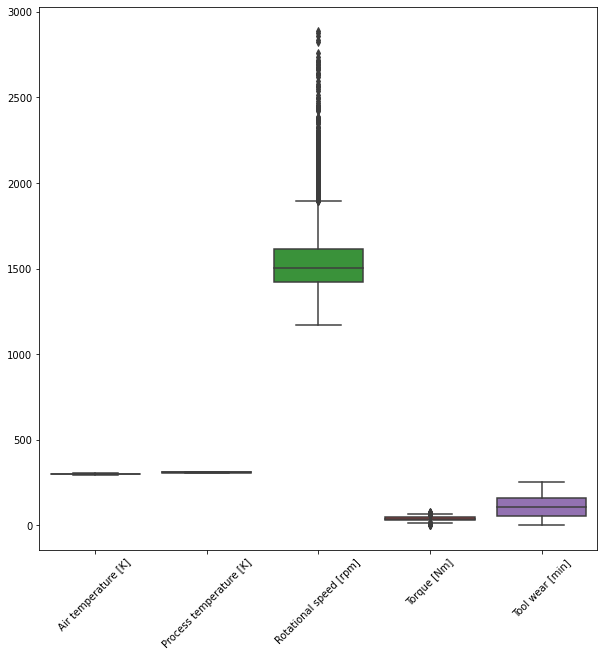

In [ ]:
x = data[['Air temperature [K]', 'Process temperature [K]','Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
f,ax = plt.subplots(figsize=(10, 10))
sns.boxplot(data=x)
plt.xticks(rotation=45)
plt.show()

### Distribución de los datos

#### Variable Target (falla/no falla)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



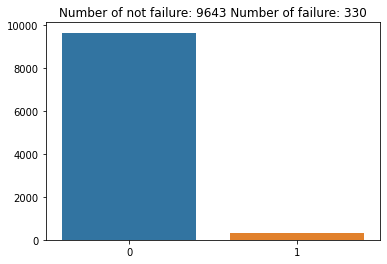

In [ ]:
vc = data['Target'].value_counts()
sns.barplot(vc.index, vc.values)
plt.title('Number of not failure: {:.0f}'.format(vc[0]) + ' Number of failure: {:.0f}'.format(vc[1]))
plt.show()

#### Tipo de fallo

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

fig = px.pie(data,
             title  = 'Failure Types',
             values = 'UDI',
             names  = 'Failure Type')
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



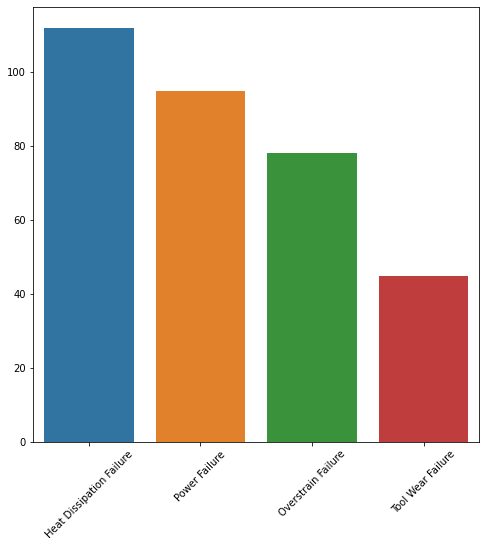

In [ ]:
vc = data.drop(data[data["Failure Type"]=="No Failure"].index)["Failure Type"].value_counts()
f,ax = plt.subplots(figsize=(8, 8))
sns.barplot(vc.index, vc.values)
plt.xticks(rotation=45)
plt.show()

#### distribucion de muestras por clase

In [ ]:
def plot_density_distribution(feat_list, data):
  plt.figure(figsize=(26,15))	
  for i,c in enumerate(feat_list):    
      plt.subplot(2,5,i+1)
      k=data[[c,"Target"]]
      for v in data["Target"].unique():
          sns.distplot(k[c][k["Target"]==v], label=v);
      plt.yticks([])
      plt.legend(['No fallo', 'Fallo'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

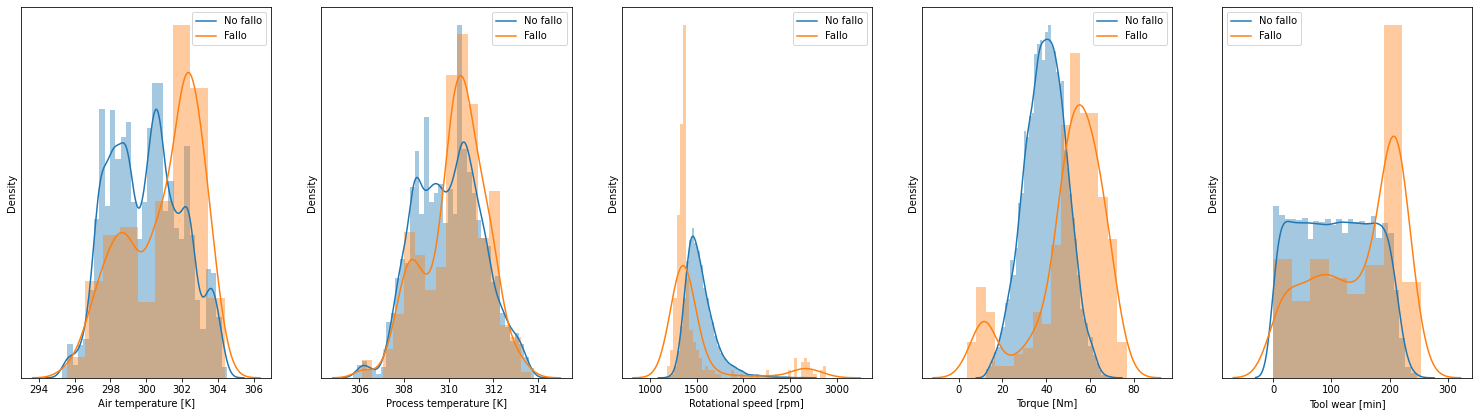

In [ ]:
plot_density_distribution(['Air temperature [K]', 'Process temperature [K]','Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'], data)

In [ ]:
# Relación entre la variable Air Temperature con las variables a predecir Target/Failure Type
fig = px.box(data,
             y      =  "Air temperature [K]",
             x      =  "Target",
             title  =  "Relación entre la variable Air Temperature con las variables a predecir Target/Failure Type",
             color  =  "Failure Type",
             width  =  800,
             height =  400)
fig.show()

# Relación entre la variable Process Tempearture con las variables a predecir Target/Failure Type
fig = px.box(data,
             y      =  "Process temperature [K]",
             x      =  "Target",
             title  =  "Relación entre la variable Process Tempearture con las variables a predecir Target/Failure Type",
             color  =  "Failure Type",
             width  =  800,
             height =  400)
fig.show()

# Relación entre la variable Rotational speed [rpm] con las variables a predecir Target/Failure Type
fig = px.box(data,
             y      =  "Rotational speed [rpm]",
             x      =  "Target",
             title  =  "Relación entre la variable Rotational speed [rpm] con las variables a predecir Target/Failure Type",
             color  =  "Failure Type",
             width  =  800,
             height =  400)
fig.show()

# Relación entre la variable Torque [Nm] con las variables a predecir Target/Failure Type
fig = px.box(data,
             y      =  "Torque [Nm]",
             x      =  "Target",
             title  =  "Relación entre la variable Torque [Nm] con las variables a predecir Target/Failure Type",
             color  =  "Failure Type",
             width  =  800,
             height =  400)
fig.show()

# Relación entre la variable Tool wear [min] con las variables a predecir Target/Failure Type
fig = px.box(data,
             y      =  "Tool wear [min]",
             x      =  "Target",
             title  =  "Relación entre la variable Tool wear [min] con las variables a predecir Target/Failure Typ",
             color  =  "Failure Type",
             width  =  800,
             height =  400)
fig.show()

## Limpieza de datos


### Eliminar características

Eliminaremos las características UID y Product ID, pues presentan valores únicos para cada muestra, por lo que no aportan mayor información al problema

In [ ]:
data.drop(['UDI', 'Product ID'], axis=1, inplace=True)

### Estandarizar características numericas del dataset
Como se pudo observar en el grafico boxplot, hay características que presentan rangos de valores muy altos y otras muy bajos, por lo que estamos en la necesidad de normalizar el dataset.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['Air temperature [K]', 
      'Process temperature [K]',
      'Rotational speed [rpm]',
      'Torque [Nm]',
      'Tool wear [min]']] = scaler.fit_transform(data[['Air temperature [K]', 'Process temperature [K]','Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']])
data

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,-0.951417,-0.946356,0.067484,0.283054,-1.695647,0,No Failure
1,L,-0.901428,-0.878954,-0.729604,0.634238,-1.648511,0,No Failure
2,L,-0.951417,-1.013759,-0.227940,0.945286,-1.617087,0,No Failure
3,L,-0.901428,-0.946356,-0.590253,-0.048061,-1.585664,0,No Failure
4,L,-0.901428,-0.878954,-0.729604,0.002108,-1.554240,0,No Failure
...,...,...,...,...,...,...,...,...
9995,M,-0.601495,-1.081162,0.362908,-1.051442,-1.475680,0,No Failure
9996,H,-0.551506,-1.081162,0.518981,-0.820665,-1.428545,0,No Failure
9997,M,-0.501517,-0.946356,0.591443,-0.660124,-1.349985,0,No Failure
9998,H,-0.501517,-0.878954,-0.729604,0.854982,-1.302849,0,No Failure


### Transformación de datos categóricos

#### type
Usaremos el algoritmo OneHotEncoder para obtener una representación númerica de la variable **Tipo de maquina**, sin suponer ninguna prioridad sobre los valores de la variable. 

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
ohe.fit(data[['Type']])
data[["H","L","M"]] = ohe.transform(data[['Type']])
data.drop(['Type'], axis=1, inplace=True)

In [ ]:
data

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,H,L,M
0,-0.951417,-0.946356,0.067484,0.283054,-1.695647,0,No Failure,0.0,0.0,1.0
1,-0.901428,-0.878954,-0.729604,0.634238,-1.648511,0,No Failure,0.0,1.0,0.0
2,-0.951417,-1.013759,-0.227940,0.945286,-1.617087,0,No Failure,0.0,1.0,0.0
3,-0.901428,-0.946356,-0.590253,-0.048061,-1.585664,0,No Failure,0.0,1.0,0.0
4,-0.901428,-0.878954,-0.729604,0.002108,-1.554240,0,No Failure,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
9995,-0.601495,-1.081162,0.362908,-1.051442,-1.475680,0,No Failure,0.0,0.0,1.0
9996,-0.551506,-1.081162,0.518981,-0.820665,-1.428545,0,No Failure,1.0,0.0,0.0
9997,-0.501517,-0.946356,0.591443,-0.660124,-1.349985,0,No Failure,0.0,0.0,1.0
9998,-0.501517,-0.878954,-0.729604,0.854982,-1.302849,0,No Failure,1.0,0.0,0.0


## Dividir el dataset para cada problema de clasificación

### Modelo de clasificación binario (falla/no falla)

Primero eliminaremos la variable a predecir que contiene la información del tipo de fallo. Esta variable será útil en la construcción del segundo modelo predictivo para saber el tipo da fallo.

In [ ]:
data_estimador1 = data.drop(["Failure Type"], axis=1)
data_estimador1.head(3)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,H,L,M
0,-0.951417,-0.946356,0.067484,0.283054,-1.695647,0,0.0,0.0,1.0
1,-0.901428,-0.878954,-0.729604,0.634238,-1.648511,0,0.0,1.0,0.0
2,-0.951417,-1.013759,-0.227940,0.945286,-1.617087,0,0.0,1.0,0.0


In [ ]:
# Exportamos el dataset
data_estimador1.to_csv('dataset_clasificador_binario.csv', index=False)

### Modelo de clasificación multiples clases (tipo de falla)

Primero eliminaremos los registros cuyas maquinas no tengan falla. Ademas eliminaremos la variable a predecir que indica si una maquina ha fallado o no. Se eliminaran estos registros y la columna target del primer modelo porque en esta segunda fase de predicción sabemos que una maquina ha fallado.

In [ ]:
data_estimador2 = data.drop(data[data["Target"]==0].index)
data_estimador2 = data_estimador2.drop(['Target'], axis=1)
len(data_estimador2)

330

#### Transformación de datos categoricos (Failure Type)
Usaremos el algoritmo OrdinalEncoder para obtener un representación númerica de la segunda variable a predecir **Failure Type**. Como esta es una variable target la cual contiene 4 clases, no importa que las asignaciones númericas a las clases esten representadas de manera secuencial

In [ ]:
data_estimador2

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type,H,L,M
50,-0.551506,-0.609342,7.369473,-3.549861,0.551157,Power Failure,0.0,1.0,0.0
69,-0.551506,-0.676745,-0.718456,2.580797,1.305329,Power Failure,0.0,1.0,0.0
77,-0.601495,-0.744148,-0.467624,0.132547,1.572432,Tool Wear Failure,0.0,1.0,0.0
160,-0.801450,-1.215968,-1.431932,2.079106,1.698127,Overstrain Failure,0.0,1.0,0.0
161,-0.851439,-1.283370,-0.707308,1.236266,1.729551,Overstrain Failure,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
9758,-0.701473,-0.137523,4.080791,-2.385939,1.729551,Tool Wear Failure,0.0,1.0,0.0
9764,-0.751461,-0.339731,-1.365044,2.681135,-1.507104,Power Failure,0.0,1.0,0.0
9822,-0.751461,-0.407134,-0.997157,2.099174,1.242481,Overstrain Failure,0.0,1.0,0.0
9830,-0.851439,-0.474537,-1.125360,1.617551,1.541008,Overstrain Failure,0.0,1.0,0.0


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
enc.fit(data_estimador2[['Failure Type']])
data_estimador2['Failure Type'] = enc.transform(data_estimador2[['Failure Type']])
data_estimador2

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type,H,L,M
50,-0.551506,-0.609342,7.369473,-3.549861,0.551157,2.0,0.0,1.0,0.0
69,-0.551506,-0.676745,-0.718456,2.580797,1.305329,2.0,0.0,1.0,0.0
77,-0.601495,-0.744148,-0.467624,0.132547,1.572432,3.0,0.0,1.0,0.0
160,-0.801450,-1.215968,-1.431932,2.079106,1.698127,1.0,0.0,1.0,0.0
161,-0.851439,-1.283370,-0.707308,1.236266,1.729551,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
9758,-0.701473,-0.137523,4.080791,-2.385939,1.729551,3.0,0.0,1.0,0.0
9764,-0.751461,-0.339731,-1.365044,2.681135,-1.507104,2.0,0.0,1.0,0.0
9822,-0.751461,-0.407134,-0.997157,2.099174,1.242481,1.0,0.0,1.0,0.0
9830,-0.851439,-0.474537,-1.125360,1.617551,1.541008,1.0,0.0,1.0,0.0


In [ ]:
# Exportamos el dataset
data_estimador2.to_csv('dataset_clasificador_multiclase.csv', index=False)

In [ ]:
data_estimador2["Failure Type"].value_counts()

0.0    112
2.0     95
1.0     78
3.0     45
Name: Failure Type, dtype: int64